 Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv


This is a small exploration of the data from the 9822 rows and 87 columns Caravan Insurance data.
The goal of the challenge was to try to predict whether or customers would be interested in buying caravan insurance.
Here we will be exploring the data a little bit, and then trying to see
if we can predict whether or not customers have health insurance.

In [2]:
carvaan_insurance = pd.read_csv('/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv')
carvaan_insurance

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,test,33,1,2,4,8,0,7,2,0,...,0,0,0,1,0,0,0,0,0,0
9818,test,24,1,2,3,5,1,5,1,3,...,0,0,0,1,0,0,0,0,0,1
9819,test,36,1,2,3,8,1,5,1,3,...,0,0,0,1,0,0,0,1,0,0
9820,test,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


The data file contains the following fields:

    ORIGIN: train or test, as described above
    MOSTYPE: Customer Subtype; see L0
    MAANTHUI: Number of houses 1 - 10
    MGEMOMV: Avg size household 1 - 6
    MGEMLEEF: Avg age; see L1
    MOSHOOFD: Customer main type; see L2

** Percentages in each group, per postal code (see L3)**:

    MGODRK: Roman catholic
    MGODPR: Protestant ...
    MGODOV: Other religion
    MGODGE: No religion
    MRELGE: Married
    MRELSA: Living together
    MRELOV: Other relation
    MFALLEEN: Singles
    MFGEKIND: Household without children
    MFWEKIND: Household with children
    MOPLHOOG: High level education
    MOPLMIDD: Medium level education
    MOPLLAAG: Lower level education
    MBERHOOG: High status
    MBERZELF: Entrepreneur
    MBERBOER: Farmer
    MBERMIDD: Middle management
    MBERARBG: Skilled labourers
    MBERARBO: Unskilled labourers
    MSKA: Social class A
    MSKB1: Social class B1
    MSKB2: Social class B2
    MSKC: Social class C
    MSKD: Social class D
    MHHUUR: Rented house
    MHKOOP: Home owners
    MAUT1: 1 car
    MAUT2: 2 cars
    MAUT0: No car
    MZFONDS: National Health Service
    MZPART: Private health insurance
    MINKM30: Income < 30.000
    MINK3045: Income 30-45.000
    MINK4575: Income 45-75.000
    MINK7512: Income 75-122.000
    MINK123M: Income >123.000
    MINKGEM: Average income
    MKOOPKLA: Purchasing power class


We'll rename the columns for convenience and cleaniness.

In [3]:
rename_carvaan_insurance = carvaan_insurance.rename({'MOSTYPE':'Customer_Subtype',
                          'MAANTHUI':'Number_of_houses',
                          'MGEMOMV':'Avg_size_household',
                          'MGEMLEEF':'Avg_age',
                          'MOSHOOFD':'Customer_main_type',
                          'MGODRK':'Roman_catholic',
                          'MGODPR':'Protestant',
                           'MGODOV':'Other_religion',
                           'MGODGE':'No_religion',
                           'MRELGE':'Married',
                           'MRELSA':'Living_together',
                           'MRELOV':'Other_relation',
                           'MFALLEEN':'Singles',
                           'MFGEKIND':'Household_without_children',
                           'MFWEKIND':'Household_with_children',
                           'MOPLHOOG':'Highlevel_education',
                           'MOPLMIDD':'Mediumlevel_education',
                           'MOPLLAAG':'Lowerlevel_education',
                           'MBERHOOG':'High_status',
                           'MBERZELF':'Entrepreneur',
                           'MBERBOER':'Farmer',
                           'MBERMIDD':'Middle_management',
                           'MBERARBG':'Skilled_labourers',
                           'MBERARBO':'Unskilled_labourers',
                           'MSKA':'Socialclass_A',
                           'MSKB1':'Socialclass_B1',
                           'MSKB2':'Socialclass_B2',
                           'MSKC':'Socialclass_C',
                           'MSKD':'Socialclass_D',
                           'MHHUUR':'Rented_house',
                           'MHKOOP':'Home_owners',
                           'MAUT1':'1_car',
                           'MAUT2':'2_cars',
                           'MAUT0':'No_car',
                           'MZFONDS':'National_HealthService',
                           'MZPART':'Private_health_insurance',
                           'MINKM30':'Income_30',
                           'MINK3045':'Income30_45',
                           'MINK4575':'Income45_75',
                           'MINK7512':'Income75_122',
                           'MINK123M':'Income_123',
                           'MINKGEM':'Average_income',
                           'MKOOPKLA':'Purchasing_power_class',
                           'PWAPART':'private_thirdparty_insurance',
                          'PWABEDR':'thirdparty_insurance_firms',
                          'PWALAND':'thirdparty_insurance_agriculture',
                          'PPERSAUT':'car_policies',
                          'PBESAUT':'delivery van policies',
                          'PMOTSCO':'motorcycle/scooter_policies',
                          'PVRAAUT':'lorry_policies',
                           'PAANHANG':'trailer_policies',
                           'PTRACTOR':'tractor_policies',
                           'PWERKT':'agricultural_machines_policies',
                           'PBROM':'moped_policies',
                           'PLEVEN':'life_insurances',
                           'PPERSONG':'private_accident_insurance_policies',
                           'PGEZONG':'family_accidents_insurance_policies',
                           'PWAOREG':'disability_insurance_policies',
                           'PBRAND':'fire_policies',
                           'PZEILPL':'surfboard_policies',
                           'PPLEZIER':'boat_policies',
                           'PFIETS':'bicycle_policies',
                           'PINBOED':'property_insurance_policies',
                           'PBYSTAND':'social_security_insurance_policies',
                           'AWAPART':'private_thirdparty_insurance_1_12',
                           'AWABEDR':'Number_thirdparty_insurance_firms',
                           'AWALAND':'Number_thirdparty_insurance_agriculture',
                           'APERSAUT':'Number_car_policies',
                           'ABESAUT':'Number_delivery_van_policies',
                           'AMOTSCO':'Number_motorcycle/scooter_policies',
                           'AVRAAUT':'Number_lorry_policies',
                           'AAANHANG':'Number_trailer_policies',
                           'ATRACTOR':'Number_tractor_policies',
                           'AWERKT':'Number_agricultural_machines_policies',
                           'ABROM':'Number_moped_policies',
                           'ALEVEN':'Number_life_insurances',
                           'APERSONG':'Number_privatAvg_size_householde_accident_insurance_policies',
                           'AGEZONG':'Number_family_accidents_insurance_policies',
                           'AWAOREG':'Number_disability_insurance_policies',
                           'ABRAND':'Number_fire_policies',
                           'AZEILPL':'Number_surfboard_policies',
                           'APLEZIER':'Number_boat_policies',
                           'AFIETS':'Number_bicycle_policies',
                           'AINBOED':'Number_property_insurance_policies',
                           'ABYSTAND':'Number_social_security_insurance_policies',
                           'CARAVAN':' Number_mobilehome_policies_0_1'}, 
                 axis=1)
 
#rename_carvaan_insurance

In [4]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# rename_carvaan_insurance['Income_30'].value_counts()
# rename_carvaan_insurance['Income30_45'].value_counts()
# rename_carvaan_insurance['Income45_75'].value_counts()
# rename_carvaan_insurance['Income75_122'].value_counts()
# rename_carvaan_insurance['Income_123'].value_counts()
# rename_carvaan_insurance['Private_health_insurance'].value_counts()

Based on this datasets, I analyze to explore the datasets, rename the columns name, and this data sets is supervised learning datasets.
Calculating the correlation coefficent to analyze the relationship between the variables.
Applying various methods and techiques and evualting the resulting model. 
Comparing the models to select the best one.


In [5]:
rename_carvaan_insurance.describe()

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,...,Number_privatAvg_size_householde_accident_insurance_policies,Number_family_accidents_insurance_policies,Number_disability_insurance_policies,Number_fire_policies,Number_surfboard_policies,Number_boat_policies,Number_bicycle_policies,Number_property_insurance_policies,Number_social_security_insurance_policies,Number_mobilehome_policies_0_1
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [6]:
carvaan_correlation = rename_carvaan_insurance[['Number_of_houses','Avg_age','Average_income','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a = carvaan_correlation.corr()
a.head(20)

,Number_of_houses,Avg_age,Average_income,Customer_main_type,Roman_catholic,No_religion,Private_health_insurance,Avg_size_household,Home_owners,Married,Number_family_accidents_insurance_policies,Number_disability_insurance_policies,Number_fire_policies,Number_surfboard_policies,Number_boat_policies,Number_bicycle_policies,Number_property_insurance_policies,Number_social_security_insurance_policies
Number_of_houses,1.000000,0.052448,-0.007654,-0.048317,0.004304,0.018018,0.010522,-0.004315,0.038081,0.006801,0.007011,-0.012374,-0.001343,-0.007991,-0.001384,-0.012526,0.031936,-0.005851
Avg_age,0.052448,1.000000,-0.090784,0.009698,-0.038454,-0.114922,0.113041,-0.339942,-0.024638,-0.058155,-0.001029,-0.001511,0.017606,-0.004048,0.008401,0.018824,-0.009157,-0.012377
Average_income,-0.007654,-0.090784,1.000000,-0.293179,0.189870,-0.052109,0.435711,0.275162,0.428491,0.344090,0.025208,-0.019109,0.015827,0.012033,0.006644,0.029422,0.026610,0.032873
Customer_main_type,-0.048317,0.009698,-0.293179,1.000000,-0.208057,-0.018710,-0.341049,0.029737,-0.112833,-0.012349,-0.009087,0.002128,-0.000024,-0.003526,-0.015422,-0.027067,-0.015549,-0.041213
Roman_catholic,0.004304,-0.038454,0.189870,-0.208057,1.000000,-0.079110,0.226908,0.009383,0.097738,-0.021026,0.001523,-0.017503,-0.012222,0.002300,0.006387,-0.002163,0.006327,-0.007917
No_religion,0.018018,-0.114922,-0.052109,-0.018710,-0.079110,1.000000,-0.108362,-0.010404,-0.229741,-0.096221,-0.002508,-0.014280,-0.055646,-0.017528,-0.015563,-0.007659,0.005592,-0.028411
Private_health_insurance,0.010522,0.113041,0.435711,-0.341049,0.226908,-0.108362,1.000000,0.068720,0.369971,0.228828,0.016293,-0.006800,0.012207,0.017211,0.015947,0.013871,0.018489,0.028892
Avg_size_household,-0.004315,-0.339942,0.275162,0.029737,0.009383,-0.010404,0.068720,1.000000,0.333754,0.531272,0.017853,0.019305,-0.004668,0.003888,-0.013174,0.018487,0.010928,0.030856
Home_owners,0.038081,-0.024638,0.428491,-0.112833,0.097738,-0.229741,0.369971,0.333754,1.000000,0.380154,0.024503,0.019678,0.075988,0.031137,0.016891,0.013977,0.010297,0.035661
Married,0.006801,-0.058155,0.344090,-0.012349,-0.021026,-0.096221,0.228828,0.531272,0.380154,1.000000,0.027988,0.006080,-0.014197,0.012955,-0.005817,0.014027,-0.000396,0.031156


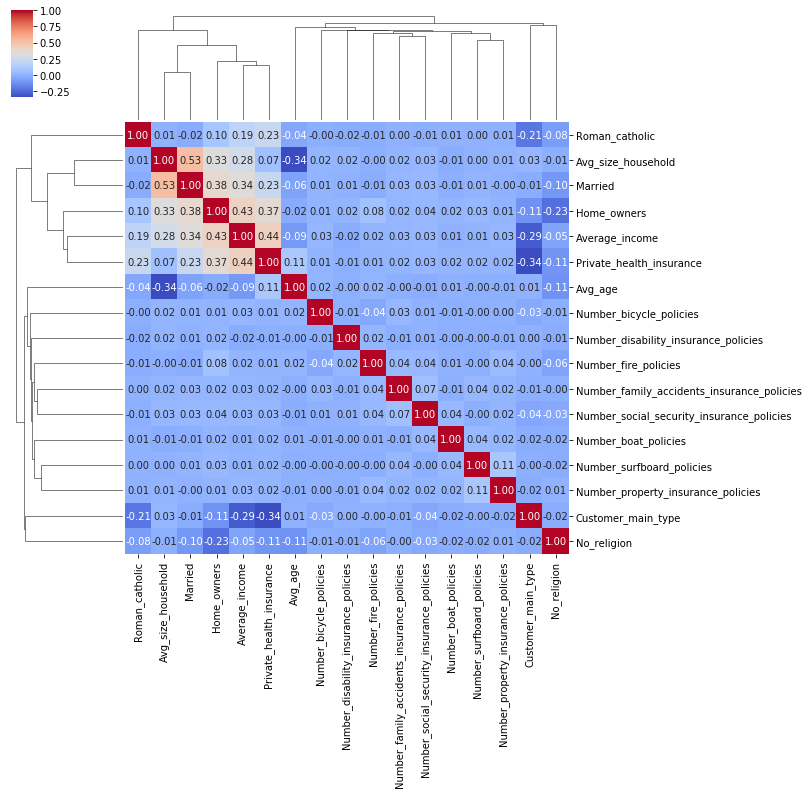

In [7]:
correlation_carvaan = sns.clustermap(carvaan_correlation.iloc[:, 1:20].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
correlation_carvaan

Another Analze shows, there is highly correlation coefficent between the Average income and Private health insurances.
Majority of the customers having income less than 75,000 and majority of customers not preferring to having private health insurances.

In [8]:
# g = sns.clustermap(rename_carvaan_insurance.iloc[:, 1:20].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
# g

To estimated probability density function over the data.

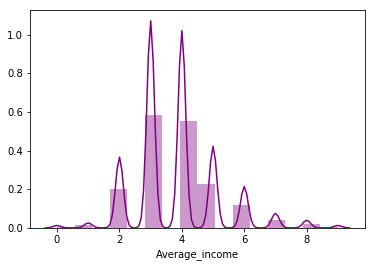

In [9]:
sns.distplot(rename_carvaan_insurance["Average_income"], bins=16, color="purple")

The “Average Income” variable appears skewed in nature and most of the Average Income values are in the range of 2 to 5.
Means Majority if customers having insurances less than 75000.

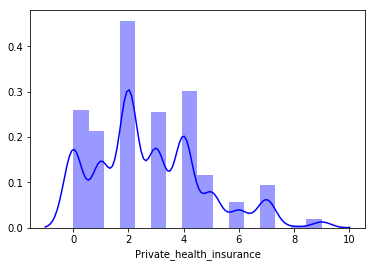

In [10]:
sns.distplot(rename_carvaan_insurance["Private_health_insurance"], bins=16, color="blue")

The “Private Health Insurance” variable appears skewed in nature and most of the Average Income values are in the range of 0 to 5.
Means Majority of customers having no private health insurances. 

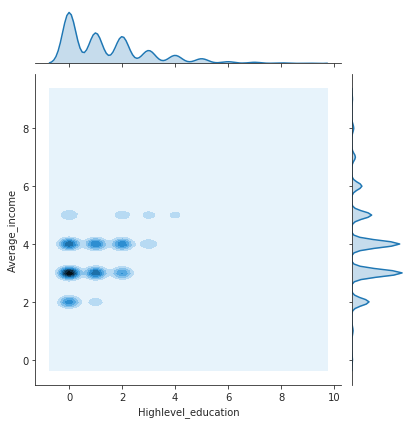

In [11]:
sns.set_style('ticks')
sns.jointplot(x = 'Highlevel_education', y = 'Average_income', data = rename_carvaan_insurance, kind='kde')

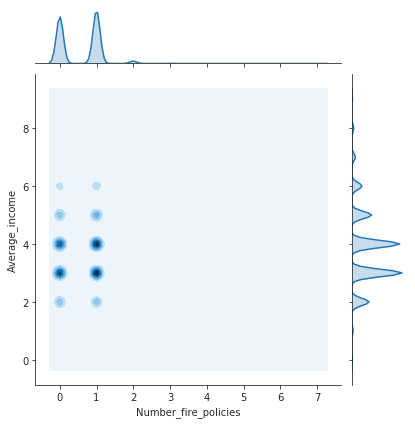

In [12]:
sns.set_style('ticks')
sns.jointplot(x = 'Number_fire_policies', y = 'Average_income', data = rename_carvaan_insurance, kind='kde')

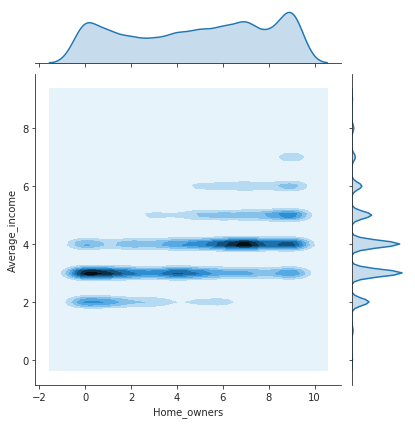

In [13]:
sns.set_style('ticks')
sns.jointplot(x = 'Home_owners', y = 'Average_income', data = rename_carvaan_insurance, kind='kde')

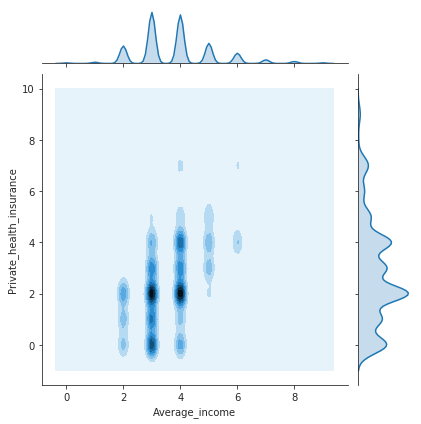

In [14]:
sns.set_style('ticks')
sns.jointplot(x = 'Average_income', y = 'Private_health_insurance', data = rename_carvaan_insurance, kind='kde')

The estimates of individual linear regression coefficients and the quality of the overall fit. 
R2 measures how much of the variation in the response variable y is explained by variation in the regressors X 

In [15]:
#x = rename_carvaan_insurance[['Average_income','Highlevel_education','Household_with_children','Married','Number_of_houses','Home_owners']]
x = rename_carvaan_insurance[['Average_income']]
y = rename_carvaan_insurance[['Private_health_insurance']]
model_insurances = sm.OLS(x,y).fit()
prediction_insurances = model_insurances.predict(x)
model_insurances.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Average_income   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                          2.509e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                        0.00
Time:                        05:27:45   Log-Likelihood:                         -21399.
No. Observations:                9822   AIC:                                  4.280e+04
Df Residuals:                    9821   BIC:                                  4.281e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Private_health_insurance     1.0042      0.006    158.395      0.000       0.992       1.017
==============================================================================
Omnibus:                      782.296   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1598.301
Skew:                          -0.534   Prob(JB):                         0.00
Kurtosis:                       4.663   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line (see the previous section of this post). Date and Time are pretty self-explanatory :) So as number of observations. Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

The data is "linear". That is, the dependent variable (Private Health Insurance) is a linear function of independent variables (Average Income).
R- square is 0.719 is being a perfect fit between the average income and private health insurances.
As expected, Income will be a strong predictor of Private health insurances, corroborated by a significant p-value for the coefficient of Income in the model.

The coefficient of 1.0042 means that as the RM variable increases by 1, the predicted value of MDEV increases by 1.0042. A few other important values are the R-squared — the percentage of variance our model explains; the standard error is the standard deviation of the sampling distribution of a statistic, most commonly of the mean; the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM meaning we predict at a 95% percent confidence that the value of RM is between 0.992 and 1.017.

In [16]:
# rename_carvaan_insurance.plot(x='Private_health_insurance', y='Average_income', style='o')
# plt.title('Average Income vs Private Health Insurance')
# plt.xlabel('Incomes')
# plt.ylabel('Percentage Insurance')
# plt.show()

In [17]:
x = rename_carvaan_insurance[['Average_income']]
y = rename_carvaan_insurance[['Private_health_insurance']]
x = sm.add_constant(x)
model_insurances = sm.OLS(y,x).fit()
prediction_insurances = model_insurances.predict(x)
model_insurances.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Private_health_insurance   R-squared:                       0.190
Model:                                  OLS   Adj. R-squared:                  0.190
Method:                       Least Squares   F-statistic:                     2301.
Date:                      Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                              05:27:45   Log-Likelihood:                -19725.
No. Observations:                      9822   AIC:                         3.945e+04
Df Residuals:                          9820   BIC:                         3.947e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2560      0.055      4.646      0.000       0.148       0.364
Average_income     0.6557      0.014     47.970      0.000       0.629       0.683
==============================================================================
Omnibus:                      761.083   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.475
Skew:                           0.644   Prob(JB):                    1.07e-234
Kurtosis:                       3.986   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at 0.2560. 

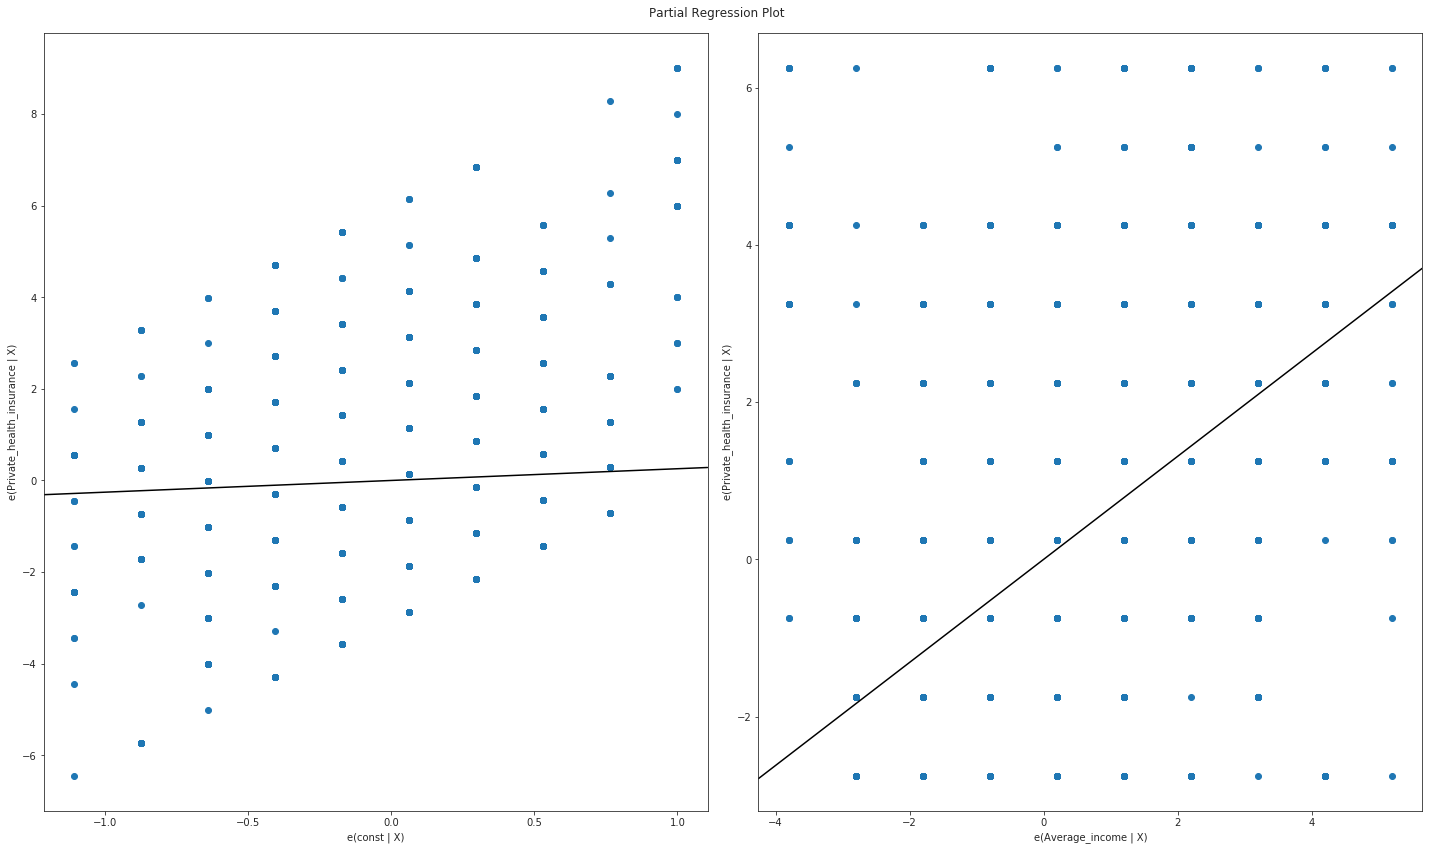

In [18]:
fig = sm.graphics.plot_partregress_grid(model_insurances, fig=plt.figure(figsize=(20,12)))

As you can see the partial regression plot confirms the influence on the partial relationship between income and Private Health Insurances. The cases greatly decrease the effect of income on Private Health Insurances. Dropping these cases confirms this.
As you can see the relationship between the variation in Private Health Insurances explained by Average Income conditionalseems to be linear, though you can see there are some observations that are exerting considerable influence on the relationship.

Drop the Origin Variable as this variable is categorical and In Modeling is better for output result if we have all numerical variable. 

In [19]:
# X = rename_carvaan_insurance
# Y = rename_carvaan_insurance["Average_income"]
carvaan_insurances = rename_carvaan_insurance.drop(["ORIGIN"], axis = 1)
#carvaan_insurances

#Linear Regression Model

In [20]:
X = carvaan_insurances[['Average_income']]
Y = rename_carvaan_insurance[['Private_health_insurance']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
predictions = lm.predict(X)
lm.score(X,Y)

0.18983200201049644

In [21]:
X = carvaan_insurances[['Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
Y = carvaan_insurances[['Average_income']]
X = sm.add_constant(X)
model_insurances = sm.OLS(Y,X).fit()
prediction_insurances = model_insurances.predict(X)
model_insurances.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average_income   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     295.8
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        05:27:46   Log-Likelihood:                -14613.
No. Observations:                9822   AIC:                         2.926e+04
Df Residuals:                    9803   BIC:                         2.940e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            2.5098      0.086     29.230      0.000       2.341       2.678
Number_of_houses                                                -0.0845      0.026     -3.201      0.001      -0.136      -0.033
Avg_size_household                                               0.0670      0.009      7.457      0.000       0.049       0.085
Avg_age                                                         -0.1095      0.015     -7.426      0.000      -0.138      -0.081
Customer_main_type                                              -0.0769      0.004    -18.826      0.000      -0.085      -0.069
Roman_catholic                                                   0.1046      0.011      9.379      0.000       0.083       0.126
No_religion                                                      0.0331      0.007      4.714      0.000       0.019       0.047
Private_health_insurance                                         0.1625      0.006     25.503      0.000       0.150       0.175
Avg_size_household                                               0.0670      0.009      7.457      0.000       0.049       0.085
Home_owners                                                      0.1006      0.004     24.094      0.000       0.092       0.109
Number_fire_policies                                             0.0025      0.010      0.259      0.795      -0.017       0.022
Married                                                          0.1102      0.007     15.444      0.000       0.096       0.124
Number_family_accidents_insurance_policies                       0.1080      0.122      0.882      0.378      -0.132       0.348
Number_disability_insurance_policies                            -0.4168      0.152     -2.740      0.006      -0.715      -0.119
Number_fire_policies                                             0.0025      0.010      0.259      0.795      -0.017       0.022
Number_surfboard_policies                                       -0.1855      0.360     -0.515      0.607      -0.892       0.521
Number_boat_policies                                            -0.0219      0.139     -0.158      0.875      -0.295       0.251
Number_privatAvg_size_householde_accident_insurance_policies    -0.1484      0.161     -0.925      0.355      -0.463       0.166
Number_bicycle_policies                                          0.0997      0.052      1.922      0.055      -0.002       0.201
Number_property_insurance_policies                               0.2307      0.118      1.959      0.050      -0.000       0.462
Number_social_security_insurance_policies                        0.0377      0.092      0.408      0.683      -0.143

This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions. 

In [22]:
# X = carvaan_insurances.iloc[:,:-1].values
# Y = carvaan_insurances.iloc[:,1].values
# X = X.drop("Average_income", 1)
X = carvaan_insurances[['Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
Y = carvaan_insurances[['Average_income']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
predictions = lm.predict(X)
model.score(X,Y)

0.3517044621398002

In [23]:
model.coef_

array([[-9.49373079e-02,  7.81713841e-02, -1.00978615e-01,
        -7.96435261e-02,  1.05429362e-01,  3.78331605e-02,
         1.66272892e-01,  7.81713841e-02,  9.77441286e-02,
         5.33136190e-03,  1.08002079e-01,  8.67035422e-02,
        -4.21708707e-01,  5.33136190e-03, -2.02242846e-01,
         2.28472449e-04, -1.68738803e-01,  7.29316616e-02,
         2.78768154e-01,  2.87326091e-02]])

In [24]:
model.intercept_

array([2.45819083])

In [25]:
The result should be approximately Coefficent:
        -9.49373079e-02,  7.81713841e-02, -1.00978615e-01,
        -7.96435261e-02,  1.05429362e-01,  3.78331605e-02,
         1.66272892e-01,  7.81713841e-02,  9.77441286e-02,
         5.33136190e-03,  1.08002079e-01,  8.67035422e-02,
        -4.21708707e-01,  5.33136190e-03, -2.02242846e-01,
         2.28472449e-04, -1.68738803e-01,  7.29316616e-02,
         2.78768154e-01,  2.87326091e-02 and
The result should be approximately Coefficent is 2.45819083 respectively.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 

SyntaxError: invalid syntax (<ipython-input-25-14909d3e3912>, line 1)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([[3.46917844],
       [2.93813117],
       [3.06315022],
       ...,
       [4.29991479],
       [3.70078067],
       [2.78991164]])

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [27]:
X = carvaan_insurances[['Average_income']].values.reshape(-1,1)
Y = carvaan_insurances[['Private_health_insurance']].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
predictions = lm.predict(X)
model.score(X,Y)
Y_test = np.array(list(Y_test))
y_pred = np.array(y_pred)
Predicted_Actual = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
Predicted_Actual.head(25)

,Actual,Predicted
0,1,3.469178
1,4,2.938131
2,1,3.063150
3,4,3.514274
4,4,3.216523
5,4,3.560459
6,2,3.401056
7,2,4.258835
8,3,2.834008
9,1,3.344337


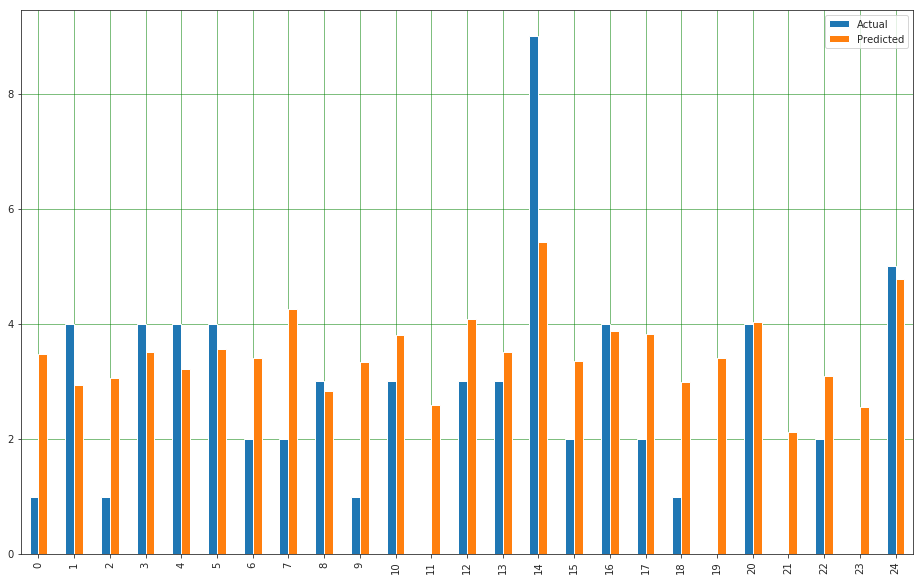

In [28]:
flatten_Graph = Predicted_Actual.head(25)
flatten_Graph.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

In [29]:
X1 = carvaan_insurances[['Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
Y1 = carvaan_insurances[['Private_health_insurance']]
# X = X.drop("Average_income", 1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)
lm1 = LinearRegression()
model = lm1.fit(X_train,Y_train)
predictions = lm1.predict(X1)
lm1.score(X1,Y1)

1.0

In [30]:
lm1.coef_

array([[ 4.68679138e-16, -6.66133815e-16, -2.44083295e-16,
         4.15186443e-16,  3.17266810e-16,  8.58103224e-16,
         1.00000000e+00, -5.84935926e-16, -1.91523254e-16,
        -9.85287047e-17, -1.62774551e-16,  3.67986892e-17,
         1.07574727e-16, -8.46509169e-17, -1.20430180e-16,
         4.66323205e-17,  4.63355990e-17,  3.51715185e-16,
        -2.16406754e-16,  5.16080234e-17]])

In [31]:
lm1.intercept_

array([-2.66453526e-15])

Model Evaluation Metrics for Regression
Mean Squared Error is the mean of the squared errors.

In [32]:
from sklearn.metrics import accuracy_score, mean_squared_error
predictions = lm.fit(X_train,Y_train).predict(X_test)
print(mean_squared_error(predictions, Y_test))

6.328323041957195e-30


The Mean Squared Error is 6.328323041957195e-30 used as a default metric for evaluation of the performance of most regression algorithms 

In [33]:
# features_cols = ['Private_health_insurance','Home_owners','Number_fire_policies','Married']
# X = carvaan_insurances[features_cols]
# Y = carvaan_insurances["Average_income"]
X = carvaan_insurances[['Average_income']]
# X = X.drop("Average_income", 1)
Y = carvaan_insurances[['Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
list(zip(features_cols,linear_regressor.coef_ ))

NameError: name 'features_cols' is not defined

In [34]:
X2 = carvaan_insurances[['Average_income']]
# X = X.drop("Average_income", 1)
Y2 = carvaan_insurances[['Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','No_religion','Private_health_insurance','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X2, Y2)  # perform linear regression
list(zip(X2,linear_regressor.coef_ ))

[('Average_income', array([-0.00236987]))]

In [35]:
X1 = carvaan_insurances[['Private_health_insurance']]
# X = X.drop("Average_income", 1)
Y1 = carvaan_insurances[['Number_of_houses','Avg_size_household','Average_income','Avg_age','Customer_main_type','Roman_catholic','No_religion','Avg_size_household','Home_owners','Number_fire_policies','Married','Number_family_accidents_insurance_policies','Number_disability_insurance_policies','Number_fire_policies','Number_surfboard_policies','Number_boat_policies','Number_privatAvg_size_householde_accident_insurance_policies','Number_bicycle_policies','Number_property_insurance_policies','Number_social_security_insurance_policies']]
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y1)  # perform linear regression
list(zip(X1,linear_regressor.coef_ ))

[('Private_health_insurance', array([0.00216478]))]

In this, I studied the most fundamental machine learning algorithms i.e. linear regression.
I implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library and others helpful library.

